In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb),('XGB', xgb),('LGBM', lgbm)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            l...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor())],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe8d0060700>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9912781930266571

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb), ('XGB', xgb), ('LGBM', lgbm)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                              ('XGB',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=Non...
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                                            scale_pos_weight=None,
                                            subsample=None, tree_method=None,
                                            validate_parameters=None,
                                            verbosity=None)),
                              ('LGBM', LGBMRegressor())],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7fe8d0060700>,
                  passthrough=True)

In [11]:
stacking_regressor4.score(X,y)

0.9925917461096281

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([ 9.81788802,  9.82034707,  9.5411458 , 10.42891335,  9.40301704]),
 'score_time': array([0.01062083, 0.0098269 , 0.00956202, 0.0080719 , 0.00891113]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB', GradientBoostingRegressor(random_state=1)),
                                ('XGB',
                                 XGBRegressor(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                             

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,6.273472,0.016928,0.926950
1,6.622597,0.017403,0.898789
2,7.295222,0.015654,0.936517
3,6.222752,0.010350,0.929022
4,6.852071,0.018058,0.950638
5,6.503176,0.015947,0.936688
6,6.409053,0.014216,0.942846
7,6.091145,0.010547,0.926769
8,5.121177,0.004152,0.945508
9,6.289338,0.004656,0.884738


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,82.910686,0.030291,0.915074
1,83.782883,0.017066,0.899540
2,80.867255,0.017828,0.928599
3,83.068316,0.026558,0.922667
4,91.399845,0.026977,0.948425
5,81.091756,0.024153,0.920581
6,80.806705,0.024922,0.935211
7,91.900675,0.023582,0.926456
8,73.244822,0.011598,0.943125
9,72.733104,0.011318,0.887339


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.915074
1,0.899540
2,0.928599
3,0.922667
4,0.948425
5,0.920581
6,0.935211
7,0.926456
8,0.943125
9,0.887339


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.926950,0.915074
1,0.898789,0.899540
2,0.936517,0.928599
3,0.929022,0.922667
4,0.950638,0.948425
5,0.936688,0.920581
6,0.942846,0.935211
7,0.926769,0.926456
8,0.945508,0.943125
9,0.884738,0.887339


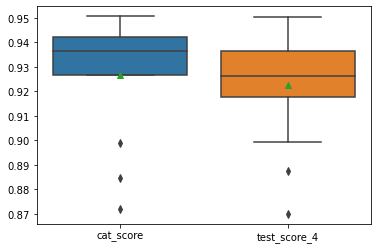

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926683,0.922641
std,0.023191,0.022348
min,0.872051,0.869982
25%,0.926860,0.917828
50%,0.936517,0.926456
75%,0.942064,0.936563
max,0.950638,0.950504
